In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
import squarify
import seaborn as sns

## Calling the Saved Dataset

In [2]:
course_dataset = pd.read_csv("data/courseData.csv", encoding= 'unicode_escape')
course_dataset.head()

,Unnamed: 0,sr_,degree_1,degree_1_specializations,campus,key_skills,key_skills_str
0,0,1001,B.E.,Mechanical,MITCOE,['CATIA'],CATIA
1,1,1002,B.E.,Mechanical,MITCOE,['CATIA'],CATIA
2,2,1003,B.E.,Mechanical,MITAOE,['CATIA'],CATIA
3,3,1004,B.E.,Mechanical,MITCOE,['CATIA'],CATIA
4,4,1005,B.E.,Mechanical,MITCOE,['CATIA'],CATIA


In [3]:
user_dataset = pd.read_csv("data/userData.csv", encoding= 'unicode_escape')
user_dataset.head()

,Unnamed: 0,userid,degree_1,degree_1_specializations,known_languages,key_skills,career_objective,key_skills_str
0,0,1001,B.E.,Computer Science & Engineering,"['English', ' Marathi', ' Hindi']","['C', ' Java', ' Keras', ' Flask', ' Deep Lear...",Computer Engineering student with good technic...,"C, Java, Keras, Flask, Deep Learning, Sel..."
1,1,1002,B.E.,Computer Science & Engineering,['Hindi English'],"['Java', ' Neural Networks', ' AI', ' Python',...",Interested in working under company offering A...,"Java, Neural Networks, AI, Python, Html5, ..."
2,2,1003,B.E.,Computer Science & Engineering,['Missing'],['Missing'],Missing,Missing
3,3,1004,B.E.,Computer Science & Engineering,"['English', ' Hindi', ' Marathi', ' Marwari']","['XML', ' C', ' Java', ' Data Structures', ' P...",Currently a final year student of Computer Eng...,"XML, C, Java, Data Structures, Python, Mo..."
4,4,1005,B.E.,Computer Science & Engineering,"['English', 'Hindi ', 'Kashmiri ', ' Urdu']","['XML', ' Word', ' Data Structures', ' Communi...",To have a growth oriented and challenging care...,"XML, Word, Data Structures, Communication, ..."


## Clustering Technique

### Course Dataset - Key Skills

In [4]:
def get_common_words(model, count_words):
    count_words_new=count_words*(-1)-1
    common_words = model.cluster_centers_.argsort()[:,-1:count_words_new:-1]
    return common_words
      
def tokenize(text):
    stemmer=SnowballStemmer('english')
    return [stemmer.stem(word) for word in word_tokenize(text.lower())]

In [5]:
vectorizer= TfidfVectorizer(stop_words=set([","]),tokenizer=tokenize, max_features=1000)
X=vectorizer.fit_transform(course_dataset["key_skills_str"])
print(X.shape)
word_features = vectorizer.get_feature_names()
print(word_features)
print(len(word_features))
print(word_features[54])

(10000, 62)
['amazonwebservic', 'android', 'arduino', 'arm7', 'autocad', 'bas', 'basicsofembeddedcpython', 'c', 'cad', 'cam', 'catia', 'caticpp', 'cmstool', 'coe', 'core', 'cpp', 'cppprogram', 'cprogram', 'creo', 'css', 'design', 'eagl', 'edatoolmentorgraph', 'embed', 'embeddedc', 'embeddedcpython', 'gobot', 'golang', 'goodorganizingskil', 'html', 'internetofth', 'internetofthiltisem', 'java', 'javangskil', 'javascript', 'keil', 'laravel', 'leadership', 'linux', 'loratechnolog', 'loratformwindowsandunix', 'mathematicaltoolmatlab', 'matlab', 'microcontrol', 'microsoftoffic', 'mongodb', 'mscit', 'mysql', 'p', 'pcb', 'php', 'phpframework', 'platformwindowsandunix', 'proe', 'programminglanguageccpp', 'pspice', 'python', 'simulationsoftwareproteusmultisem', 'solidwork', 'sql', 'vhdl', 'window']
62
programminglanguageccpp


In [6]:
kmeans = KMeans(n_clusters = 15, n_init = 10, random_state=1234)
kmeans.fit(X)

KMeans(n_clusters=15, random_state=1234)

In [43]:
course_dataset.head()

,Unnamed: 0,sr_,degree_1,degree_1_specializations,campus,key_skills,key_skills_str,cluster
0,0,1001,B.E.,Mechanical,MITCOE,['CATIA'],CATIA,1
1,1,1002,B.E.,Mechanical,MITCOE,['CATIA'],CATIA,1
2,2,1003,B.E.,Mechanical,MITAOE,['CATIA'],CATIA,1
3,3,1004,B.E.,Mechanical,MITCOE,['CATIA'],CATIA,1
4,4,1005,B.E.,Mechanical,MITCOE,['CATIA'],CATIA,1


In [7]:
common_words=get_common_words(kmeans, 10)
print(common_words)

[[12 29 47 15 32  7 11 48 39 53]
 [10 53 61 15 27 26 25 24 23 22]
 [ 4 61 15 28 27 26 25 24 23 22]
 [53  4 61 15 27 26 25 24 23 22]
 [ 8  9 61 16 28 27 26 25 24 23]
 [58 18  4 61 15 27 26 25 24 23]
 [24 42 35 17  7 33 47 12 20 18]
 [26 27 43 30 45  2 38  0 59 50]
 [20 49  7 61 15 27 26 25 24 23]
 [44 57 21 54 28 42 47 14 26 25]
 [37 46  4 61 17 18 19 20 21 22]
 [61 56 39 22  3 55 60 52 41  6]
 [16 14 17 47 32 15 27 26 25 24]
 [32  7 56 61 42 47 25 26 24 23]
 [34 51 36  1 19 50 29 15 32  7]]


In [8]:
cluster_words = []
all_clusters = []
cnt = 0

for i in common_words:
    for j in i:
        cluster_words.append(word_features[j])
        cnt=cnt+1
        if cnt == len(i):
            all_clusters.append(cluster_words)
            cluster_words=[]
            cnt = 0

In [9]:
print("Common words in Each Cluster")
index = 0
for i in all_clusters:
    print("Cluster ", index, "- ", " ".join(i))
    index=index+1

Common words in Each Cluster
Cluster  0 -  cmstool html mysql cpp java c caticpp p loratechnolog proe
Cluster  1 -  catia proe window cpp golang gobot embeddedcpython embeddedc embed edatoolmentorgraph
Cluster  2 -  autocad window cpp goodorganizingskil golang gobot embeddedcpython embeddedc embed edatoolmentorgraph
Cluster  3 -  proe autocad window cpp golang gobot embeddedcpython embeddedc embed edatoolmentorgraph
Cluster  4 -  cad cam window cppprogram goodorganizingskil golang gobot embeddedcpython embeddedc embed
Cluster  5 -  solidwork creo autocad window cpp golang gobot embeddedcpython embeddedc embed
Cluster  6 -  embeddedc matlab keil cprogram c javangskil mysql cmstool design creo
Cluster  7 -  gobot golang microcontrol internetofth mongodb arduino linux amazonwebservic sql php
Cluster  8 -  design pcb c window cpp golang gobot embeddedcpython embeddedc embed
Cluster  9 -  microsoftoffic simulationsoftwareproteusmultisem eagl programminglanguageccpp goodorganizingskil matlab

In [10]:
course_dataset['cluster']=kmeans.labels_

cluster  degree_1_specializations                  
0        Computer Science  Engineering                 1547
         Electronics  Telecommunication Engineering       2
         Mechanical                                       1
1        Mechanical                                    1054
2        Mechanical                                     425
3        Mechanical                                    1025
4        Mechanical                                     652
5        Mechanical                                     771
6        Computer Science  Engineering                    1
         Electronics  Telecommunication Engineering     904
7        Electronics  Telecommunication Engineering     578
8        Electronics  Telecommunication Engineering     495
9        Electronics  Telecommunication Engineering     467
10       Civil Engineering                              584
11       Electronics  Telecommunication Engineering     385
12       Computer Science  Engineering          

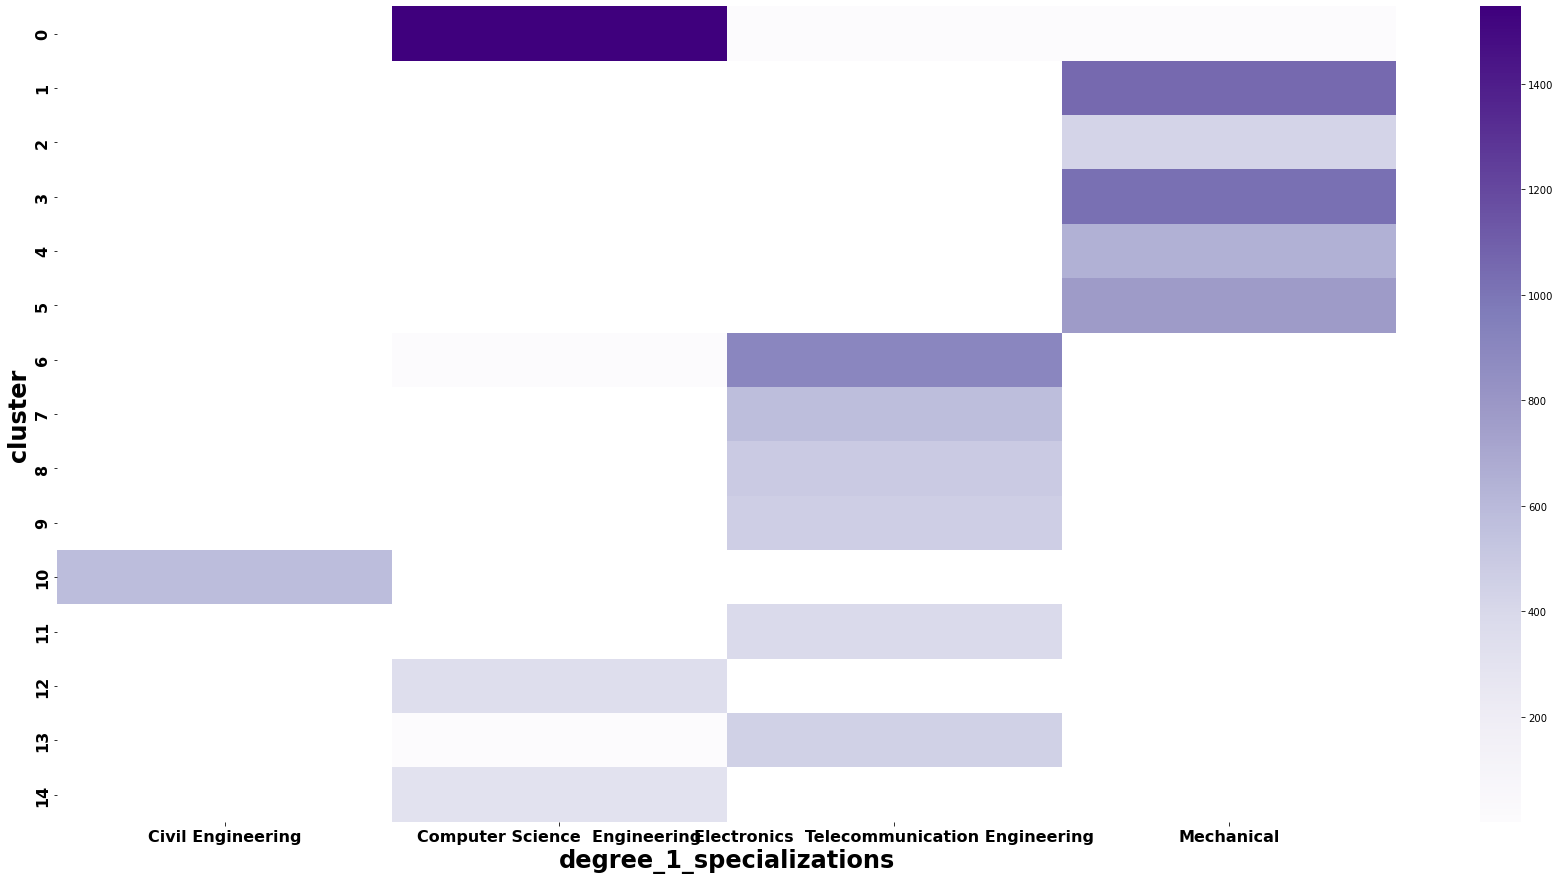

In [11]:
clusters = course_dataset.groupby(["cluster", "degree_1_specializations"]).size()
print(clusters)
fig, ax = plt.subplots(figsize = (30, 15))
sns.heatmap(clusters.unstack(level = 'degree_1_specializations'), ax = ax, cmap = "Purples")
ax.set_xlabel('degree_1_specializations', fontdict = {'weight': 'bold', 'size': 24})
ax.set_ylabel("cluster", fontdict = {'weight': 'bold', 'size': 24})
for label in ax.get_xticklabels():
    label.set_size(16)
    label.set_weight("bold")
for label in ax.get_yticklabels():
    label.set_size(16)
    label.set_weight("bold")  


In [12]:
#https://github.com/adrij/Udemy-recommender-system/blob/master/4_Clustering_and_RS.ipynb
#also uses elbow method to:
#I investigated the relationship between the number of clusters and the inertia (within-cluster sum-of-squares ) to find 
#to optimal number of clusters. According to the elbow method, the line is an arm and the "elbow" on the arm is the 
#value of k that is the best.

#### Trying different k values 

In [13]:
#k_cluster_range is the values of k we will loop through (from 1 to 30 seems common)
k_cluster_range = range(1,30)
inertia = np.zeros(len(k_cluster_range)) #sum of squares errors

for i in range(len(k_cluster_range)):
    kmeans = KMeans(n_clusters=i+1, init='k-means++', random_state=1234).fit(X)
    inertia[i] = kmeans.inertia_

Text(6, 7700, "Let's try k=6")

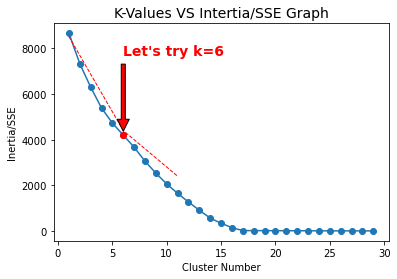

In [14]:
#plotting the kvalues vs inertia graph
plt.plot(k_cluster_range, inertia, 'o-')
plt.xlabel('Cluster Number')
plt.ylabel('Inertia/SSE')
plt.title('K-Values VS Intertia/SSE Graph', size=14)
#save the plot
#plt.savefig('elbow_method.png')

#plotting the red line and arrow
plt.plot([6], [inertia[5]], 'o--', color='red')
plt.plot([1,6,11], [8520, 4400,2400], '--', color='red', linewidth=1)
plt.annotate("Let's try k=6", xy=(6, inertia[5]), xytext=(6,7700),
             size=14, weight='bold', color='red',
             arrowprops=dict(facecolor='red', shrink=0.05))

Explained variance is 0.3122.


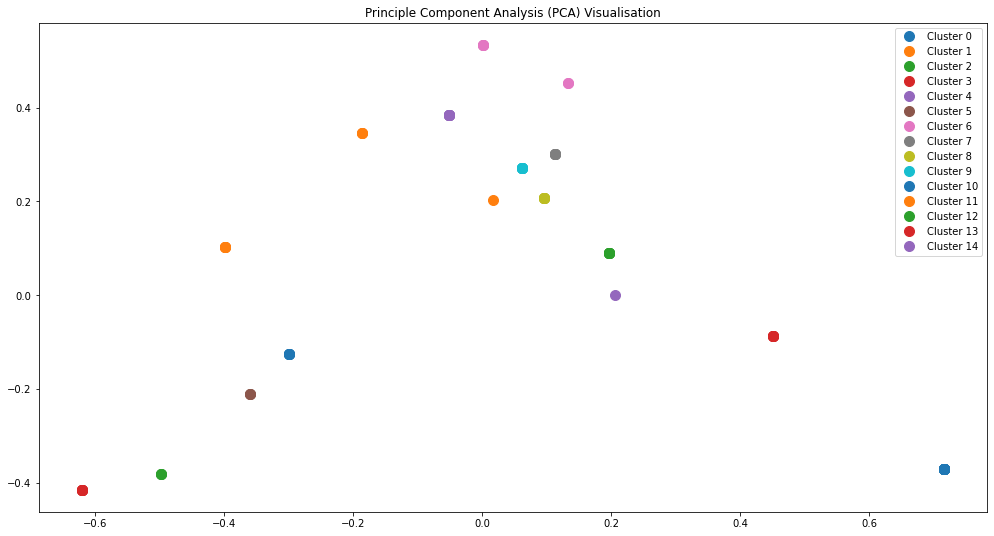

In [15]:
pca=PCA(n_components=2)
X_2d=pca.fit_transform(X.todense())

print('Explained variance is {}.'.format(round(pca.explained_variance_ratio_.sum(), 4)))

df = pd.DataFrame(dict(x=X_2d[:,0], y=X_2d[:,1], label=course_dataset['cluster'])) 
df_sample=df.sample(100)
groups = df_sample.groupby('label')

fig, ax = plt.subplots(figsize=(17, 9)) 
for cluster_name in np.arange(len(df_sample['label'].unique())):
    temp=df_sample[df_sample['label']==cluster_name]
    ax.plot(temp.x, temp.y, marker='o', linestyle='', ms=10, 
        label='Cluster '+str(cluster_name))
ax.legend(numpoints=1) 
plt.title('Principle Component Analysis (PCA) Visualisation')
plt.show()

### Course Dataset - Degree1, Degree1 Specializations & Key Skills

In [16]:
comb_frame = course_dataset.degree_1.str.cat(" " + course_dataset.degree_1_specializations.str.cat(" " + course_dataset.key_skills_str))
comb_frame = comb_frame.replace({"[^A-Za-z0-9 ]+": ""}, regex=True)

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(comb_frame)
X.shape #(10,000 x 69)

(10000, 69)

In [17]:
#other clustering 
#elbow method from https://github.com/ashishrana160796/online-course-recommendation-system/blob/master/elbow_test.py
k_cluster_range = range(1,31)
inertia = np.zeros(len(k_cluster_range)) #sum of squares errors

for i in range(len(k_cluster_range)):
    kmeans = KMeans(n_clusters=i+1, init='k-means++', random_state=1234, max_iter=100).fit(X)
    comb_frame["clusters"] = kmeans.labels_
    inertia[i] = kmeans.inertia_

Text(0.5, 1.0, 'K-Values VS Intertia/SSE Graph')

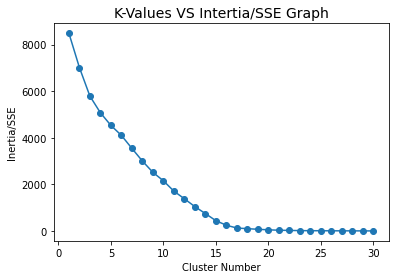

In [18]:
#plotting the kvalues vs inertia graph
plt.plot(k_cluster_range, inertia, 'o-')
plt.xlabel('Cluster Number')
plt.ylabel('Inertia/SSE')
plt.title('K-Values VS Intertia/SSE Graph', size=14)
#save the plot
#plt.savefig('elbow_method.png')

Explained variance is 0.3457.


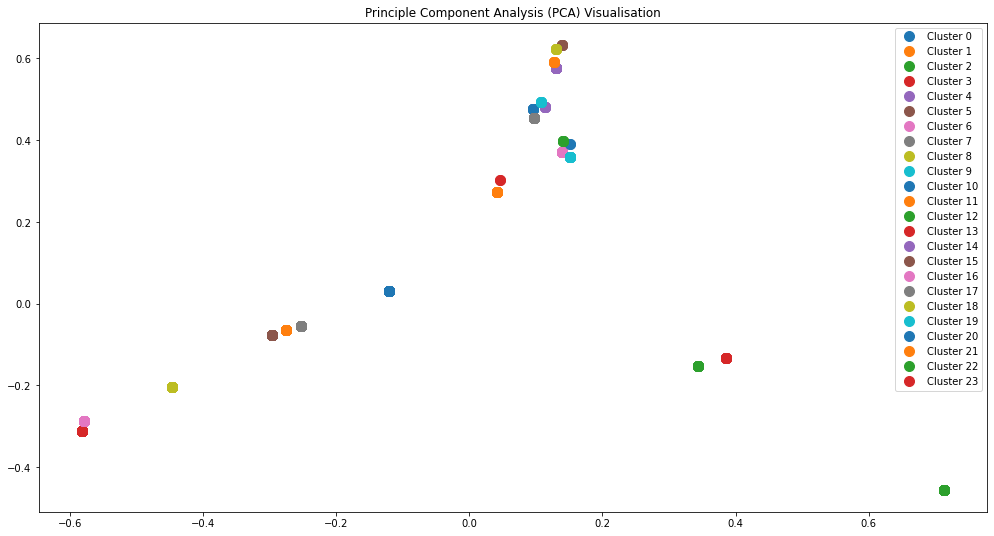

In [19]:
pca=PCA(n_components=2)
X_2d=pca.fit_transform(X.todense())

print('Explained variance is {}.'.format(round(pca.explained_variance_ratio_.sum(), 4)))

df = pd.DataFrame(dict(x=X_2d[:,0], y=X_2d[:,1], label=comb_frame["clusters"])) 
df_sample=df.sample(500)
groups = df_sample.groupby('label')

fig, ax = plt.subplots(figsize=(17, 9)) 
for cluster_name in np.arange(len(df_sample['label'].unique())):
    temp=df_sample[df_sample['label']==cluster_name]
    ax.plot(temp.x, temp.y, marker='o', linestyle='', ms=10, 
        label='Cluster '+str(cluster_name))
ax.legend(numpoints=1) 
plt.title('Principle Component Analysis (PCA) Visualisation')
plt.show()

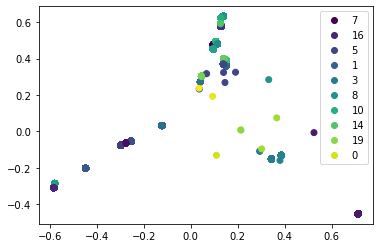

In [20]:
pca=PCA(n_components=2)
X_2d=pca.fit_transform(X.todense())
df = pd.DataFrame(dict(x=X_2d[:,0], y=X_2d[:,1], label=comb_frame["clusters"]))

plot = plt.scatter(df.x, df.y, c=df.label)
plt.legend(handles=plot.legend_elements()[0], labels=list(df["label"].unique()))
plt.show()

#### The two different clusters we made seem identical even though the first is based solely on key skills and the second is a combination of key skills, degree specialization and degree type 

### User Dataset -  Key Skills

In [21]:
vectorizer = TfidfVectorizer(stop_words=set([",", "--", "-", "#", "&", "-c-"]),tokenizer=tokenize, max_features=1000)
X = vectorizer.fit_transform(user_dataset["key_skills_str"].values.astype('U'))
print(X.shape)
word_features = vectorizer.get_feature_names()
#print(word_features)
print(len(word_features))
print(word_features[54])

(1097, 540)
540
and


In [22]:
kmeans = KMeans(n_clusters = 15, n_init = 10, random_state=1234)
kmeans.fit(X)
common_words=get_common_words(kmeans, 10)
#print(common_words)

In [23]:
cluster_words = []
all_clusters = []
cnt = 0

for i in common_words:
    for j in i:
        cluster_words.append(word_features[j])
        cnt=cnt+1
        if cnt == len(i):
            all_clusters.append(cluster_words)
            cluster_words=[]
            cnt = 0

print("Common words in Each Cluster")
index = 0
for i in all_clusters:
    print("Cluster ", index, "- ", " ".join(i))
    index=index+1

Common words in Each Cluster
Cluster  0 -  miss decisionmakingskil develop designing-solid-work design descript deep-learn deep yacc digit
Cluster  1 -  c-program css mysql javascript java htm cpp-program html php bootstrap
Cluster  2 -  java cpp mysql c html core basic-python advanc android use
Cluster  3 -  nan yacc deep develop designing-solid-work design descript deep-learn decisionmakingskil digit
Cluster  4 -  html css cpp core-java mysql c operating-system computer-network oracl python
Cluster  5 -  learn machin python cpp intellig artifici data network algorithm java
Cluster  6 -  oop dbms java cpp mysql c core html machin learn
Cluster  7 -  python data-structur cpp java computer-hardware-assembl mysql html machine-learn algorithm opencv
Cluster  8 -  jqueri bootstrap css javascript html android java cpp php c
Cluster  9 -  sql java html cpp c css php python oop javascript
Cluster  10 -  javascript css java html cpp android mysql php c mongodb
Cluster  11 -  ( ) basic moder cs

In [24]:
user_dataset['cluster']=kmeans.labels_

cluster  degree_1_specializations                                                                                                                                                                                                         
0        Computer Science & Engineering                                                                                                                                                                                                       391
1        Computer Science & Engineering                                                                                                                                                                                                        13
2        Computer Science & Engineering                                                                                                                                                                                                        77
3        C,  Data Analysis,  Data Visua

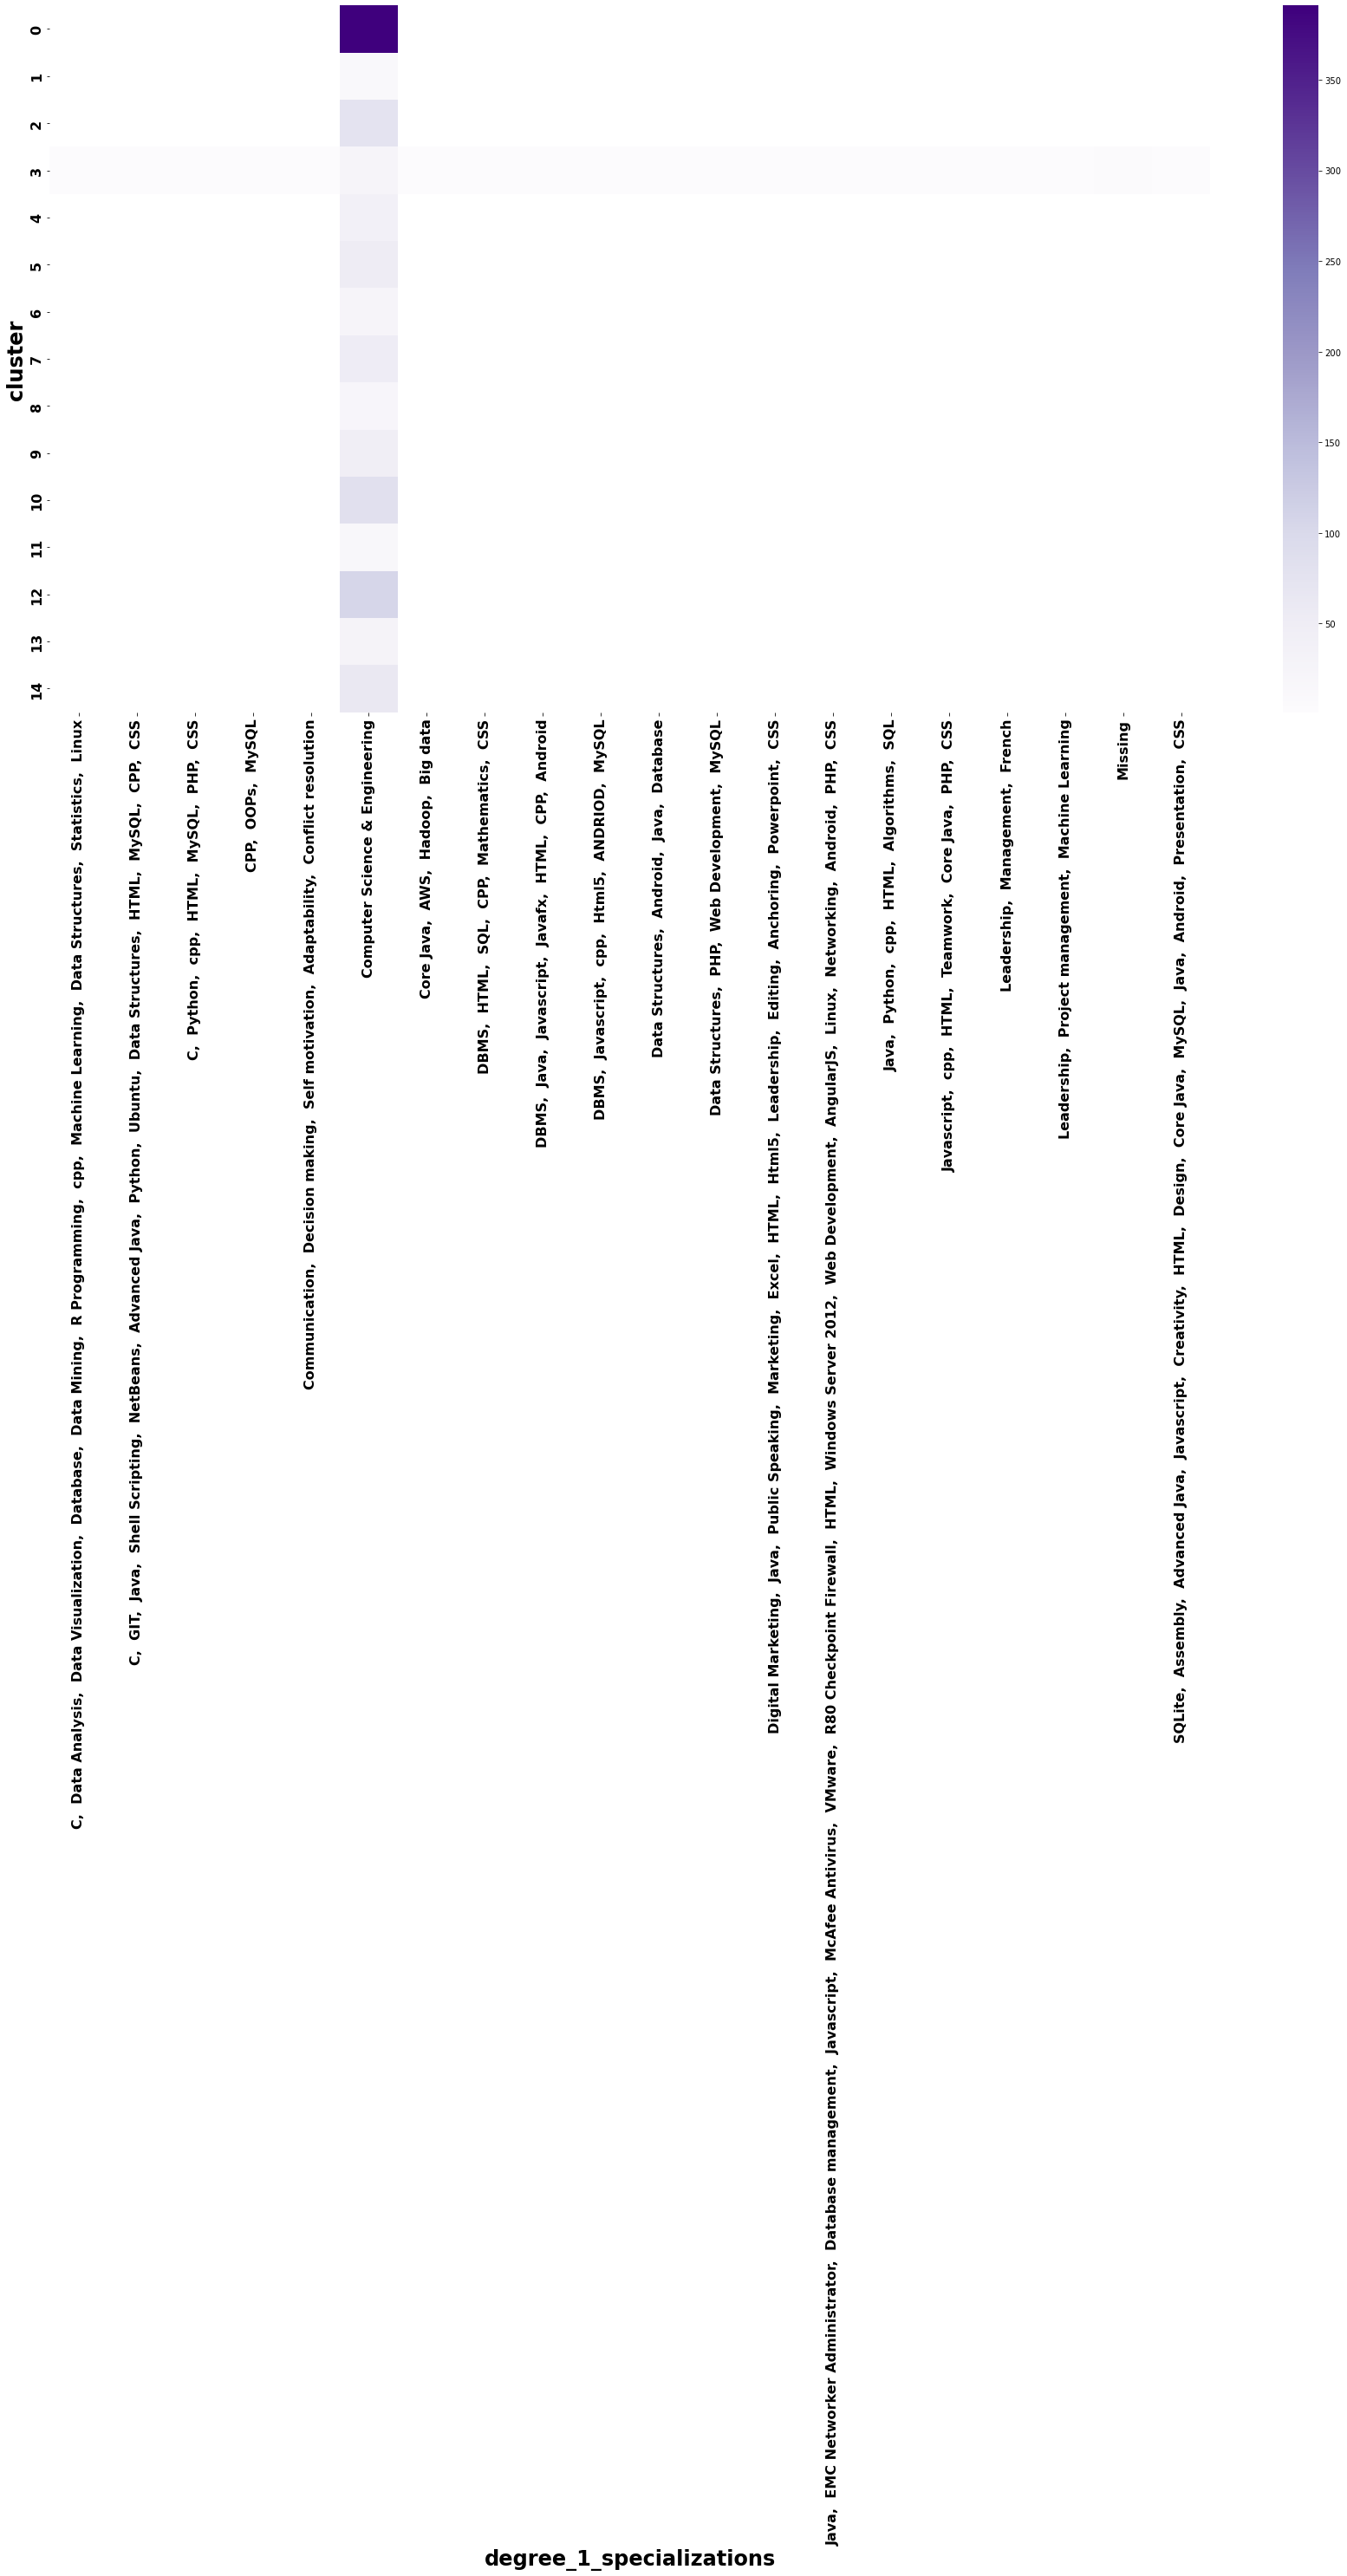

In [25]:
clusters = user_dataset.groupby(["cluster", "degree_1_specializations"]).size()
print(clusters)
fig, ax = plt.subplots(figsize = (30, 15))
sns.heatmap(clusters.unstack(level = 'degree_1_specializations'), ax = ax, cmap = "Purples")
ax.set_xlabel('degree_1_specializations', fontdict = {'weight': 'bold', 'size': 24})
ax.set_ylabel("cluster", fontdict = {'weight': 'bold', 'size': 24})
for label in ax.get_xticklabels():
    label.set_size(16)
    label.set_weight("bold")
for label in ax.get_yticklabels():
    label.set_size(16)
    label.set_weight("bold")  


#### Trying different k values 

In [26]:
#k_cluster_range is the values of k we will loop through (from 1 to 30 seems common)
k_cluster_range = range(1,30)
inertia = np.zeros(len(k_cluster_range)) #sum of squares errors

for i in range(len(k_cluster_range)):
    kmeans = KMeans(n_clusters=i+1, init='k-means++', random_state=1234).fit(X)
    inertia[i] = kmeans.inertia_

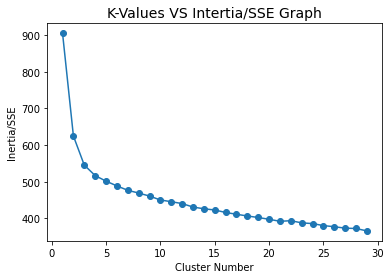

In [27]:
#plotting the kvalues vs inertia graph
plt.plot(k_cluster_range, inertia, 'o-')
plt.xlabel('Cluster Number')
plt.ylabel('Inertia/SSE')
plt.title('K-Values VS Intertia/SSE Graph', size=14)
plt.show()
#save the plot
#plt.savefig('elbow_method.png')

Explained variance is 0.4047.


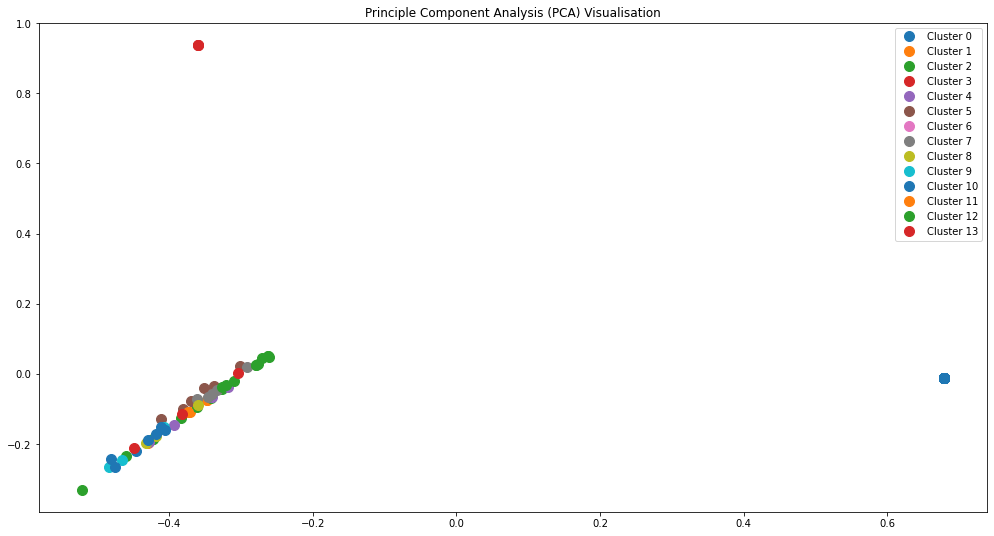

In [28]:
pca=PCA(n_components=2)
X_2d=pca.fit_transform(X.todense())

print('Explained variance is {}.'.format(round(pca.explained_variance_ratio_.sum(), 4)))

df = pd.DataFrame(dict(x=X_2d[:,0], y=X_2d[:,1], label=user_dataset['cluster'])) 
df_sample=df.sample(100)
groups = df_sample.groupby('label')

fig, ax = plt.subplots(figsize=(17, 9)) 
for cluster_name in np.arange(len(df_sample['label'].unique())):
    temp=df_sample[df_sample['label']==cluster_name]
    ax.plot(temp.x, temp.y, marker='o', linestyle='', ms=10, 
        label='Cluster '+str(cluster_name))
ax.legend(numpoints=1) 
plt.title('Principle Component Analysis (PCA) Visualisation')
plt.show()

### User Dataset -  Career Objective

In [29]:
vectorizer= TfidfVectorizer(stop_words=set([",", "--", "-", "#", "&", "-c-"]),tokenizer=tokenize, max_features=1000)
X=vectorizer.fit_transform(user_dataset["career_objective"].values.astype('U'))
print(X.shape)
word_features = vectorizer.get_feature_names()
#print(word_features)
print(len(word_features))
print(word_features[54])

(1097, 1000)
1000
activ


In [30]:
kmeans = KMeans(n_clusters = 15, n_init = 10, random_state=1234)
kmeans.fit(X)
common_words=get_common_words(kmeans, 10)
#print(common_words)

In [31]:
cluster_words = []
all_clusters = []
cnt = 0

for i in common_words:
    for j in i:
        cluster_words.append(word_features[j])
        cnt=cnt+1
        if cnt == len(i):
            all_clusters.append(cluster_words)
            cluster_words=[]
            cnt = 0

print("Common words in Each Cluster")
index = 0
for i in all_clusters:
    print("Cluster ", index, "- ", " ".join(i))
    index=index+1

Common words in Each Cluster
Cluster  0 -  and a to in secur posit . expand my challeng
Cluster  1 -  miss ââit exhibit fair extrem extract extra extens exposur explor
Cluster  2 -  nan ââit exist fair extrem extract extra extens exposur explor
Cluster  3 -  a to secur make the success fulli signific train contribut
Cluster  4 -  i . and in a develop am with to have
Cluster  5 -  to and organ my the for skill an a .
Cluster  6 -  to and my . in the a skill learn environ
Cluster  7 -  the to and my i . organ can a of
Cluster  8 -  work driven a to can profession environ which and industri
Cluster  9 -  a to progress the part scope of and be organ
Cluster  10 -  to enabl me will background educ peopl a my that
Cluster  11 -  and of to the scienc program . in data comput
Cluster  12 -  to a with renown and associ career firm perceiv chanc
Cluster  13 -  and to my a prove provid seek me in energet
Cluster  14 -  and . comput engin of in learn student to with


In [32]:
user_dataset['cluster']=kmeans.labels_

cluster  degree_1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
0        B.E.                                                                                                                                                                                                                                                                                                                                                                      

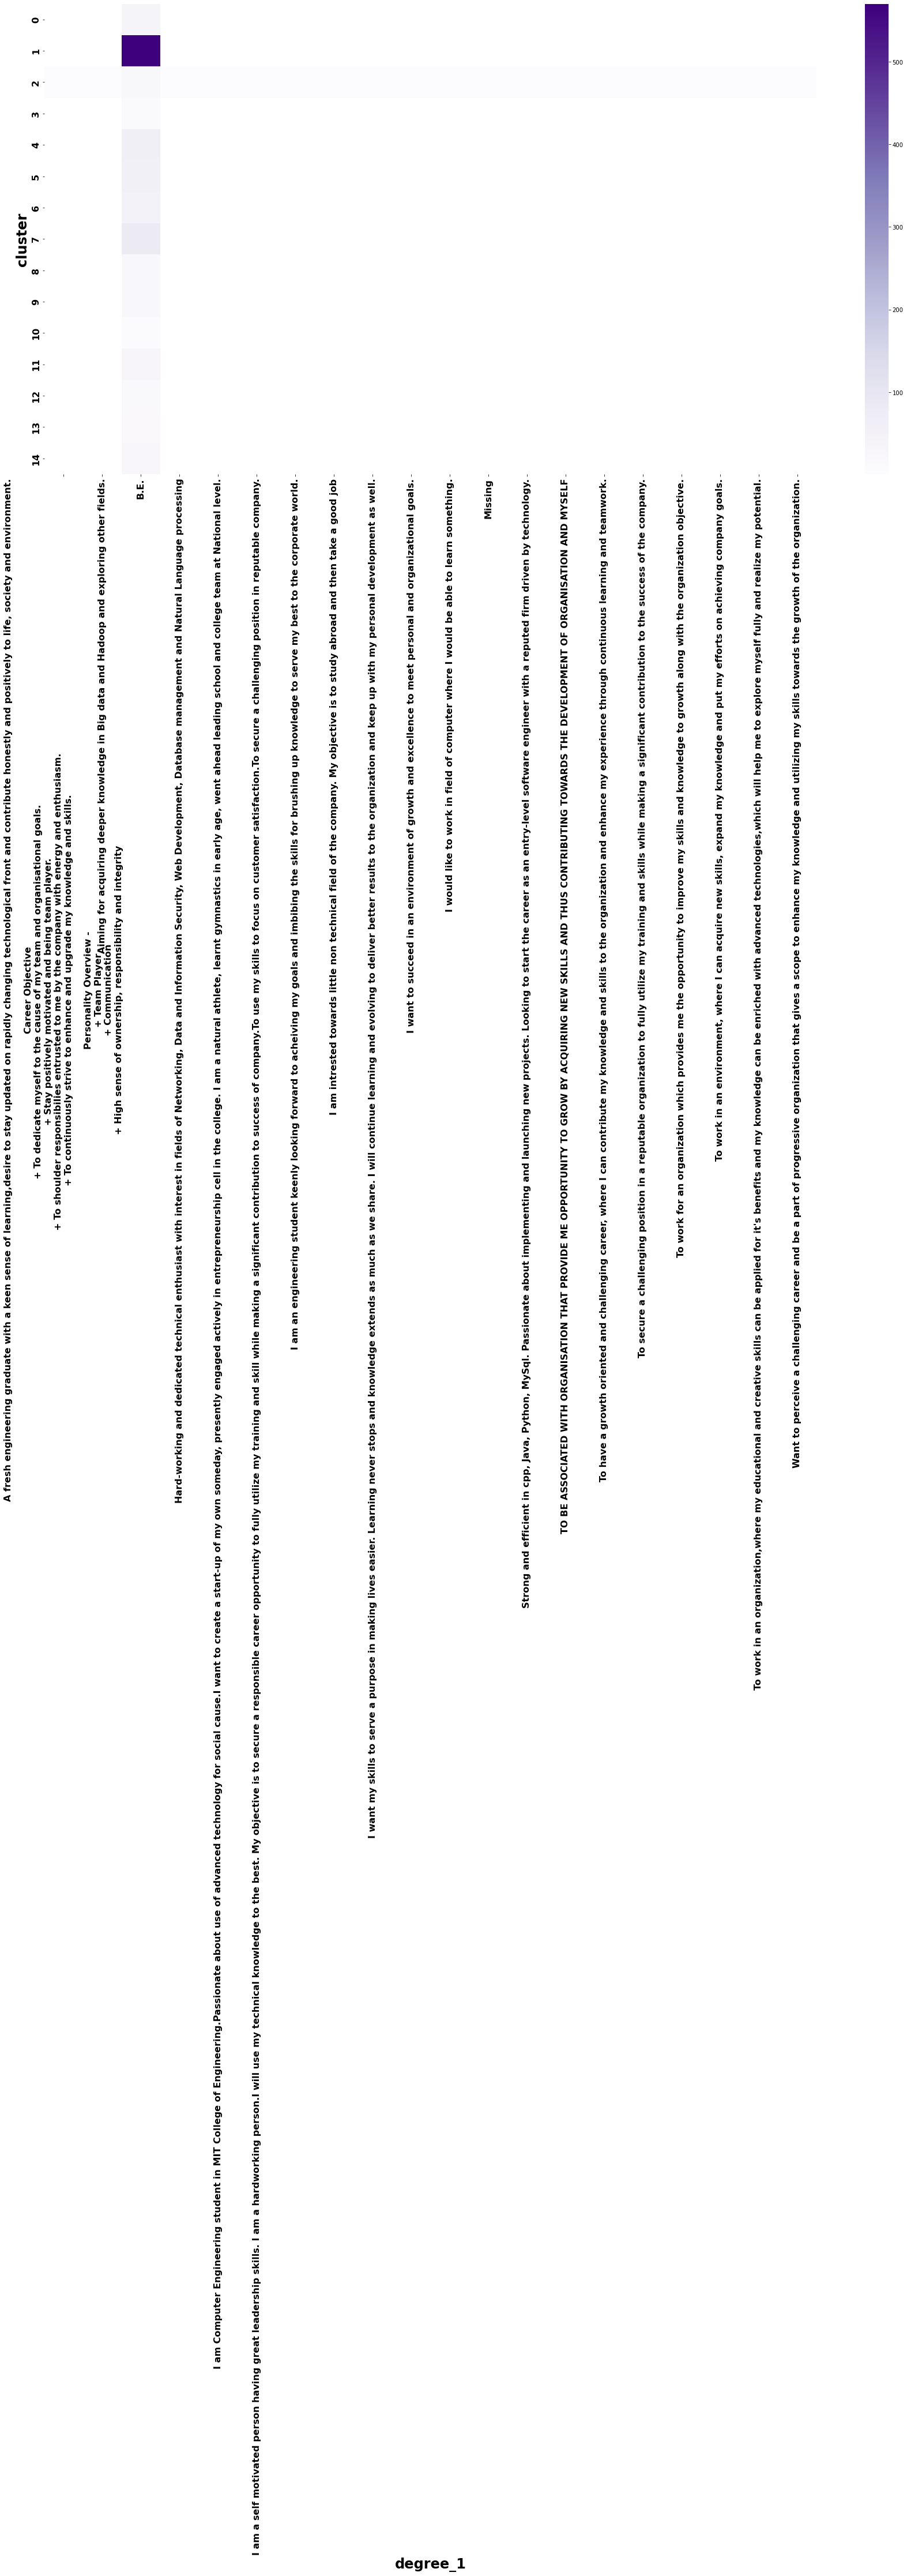

In [33]:
clusters = user_dataset.groupby(["cluster", "degree_1"]).size()
print(clusters)
fig, ax = plt.subplots(figsize = (30, 15))
sns.heatmap(clusters.unstack(level = 'degree_1'), ax = ax, cmap = "Purples")
ax.set_xlabel('degree_1', fontdict = {'weight': 'bold', 'size': 24})
ax.set_ylabel("cluster", fontdict = {'weight': 'bold', 'size': 24})
for label in ax.get_xticklabels():
    label.set_size(16)
    label.set_weight("bold")
for label in ax.get_yticklabels():
    label.set_size(16)
    label.set_weight("bold")  


cluster  degree_1_specializations                                                                                                                                                                                                         
0        Computer Science & Engineering                                                                                                                                                                                                        37
1        Computer Science & Engineering                                                                                                                                                                                                       570
2        C,  Data Analysis,  Data Visualization,  Database,  Data Mining,  R Programming,  cpp,  Machine Learning,  Data Structures,  Statistics,  Linux                                                                                        1
         C,  GIT,  Java,  Shell Scripti

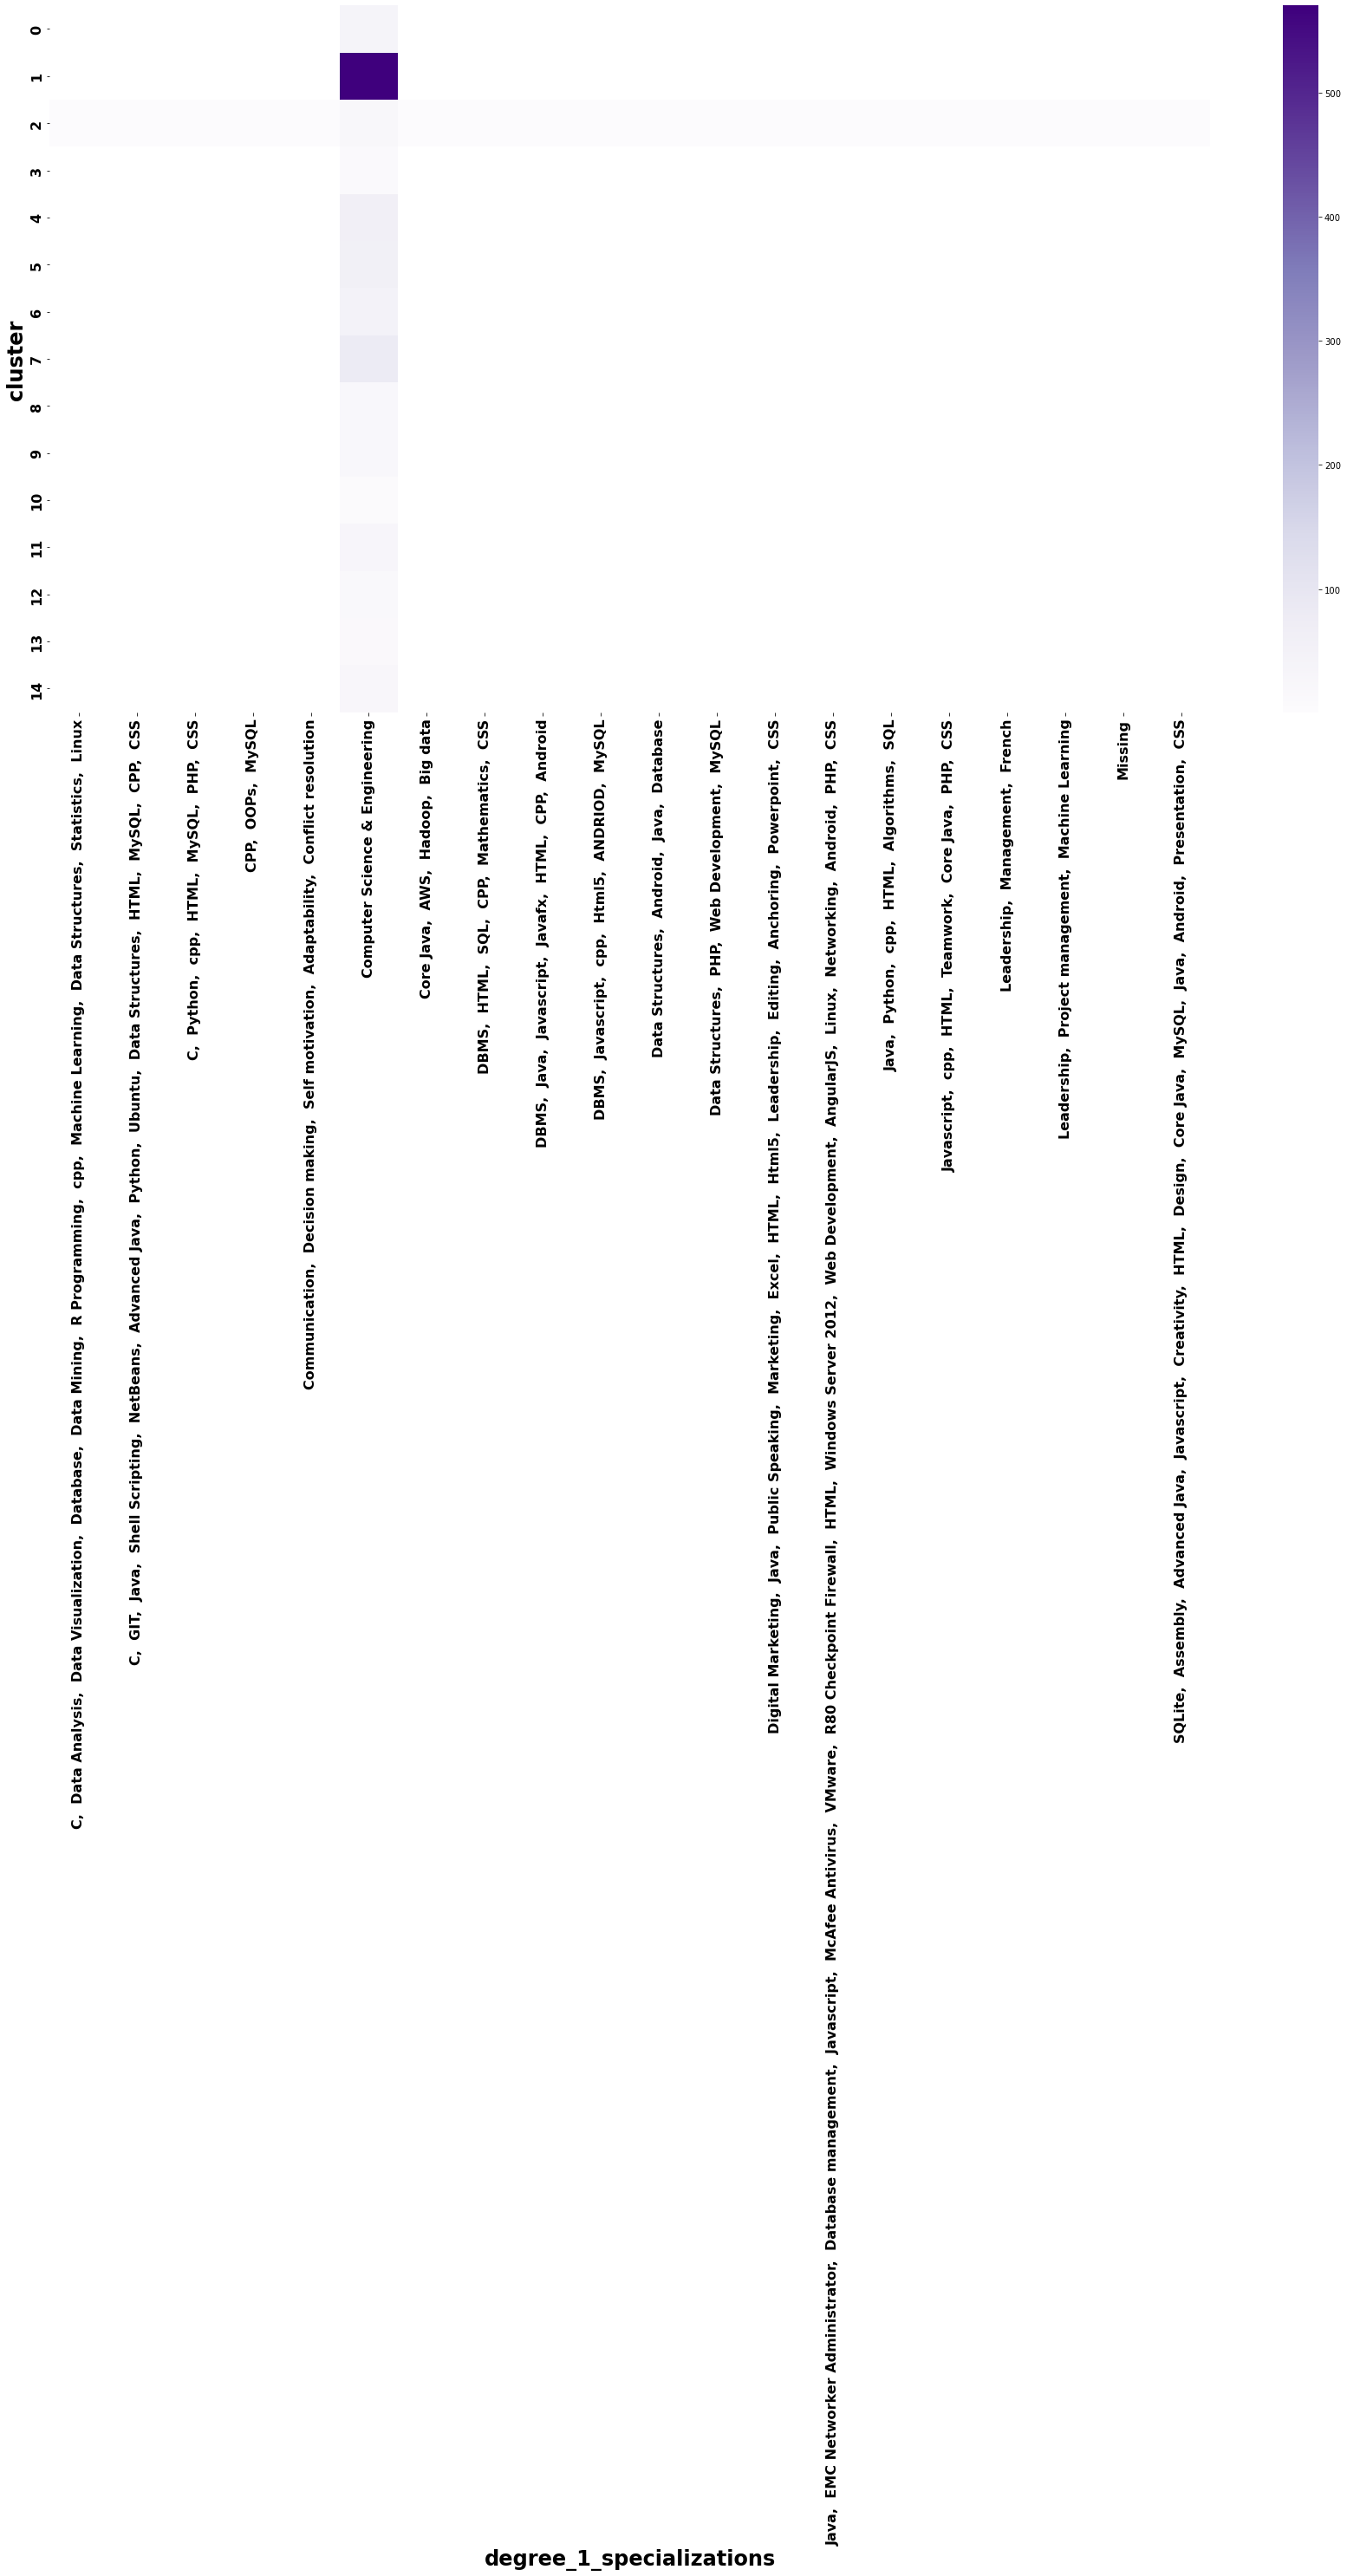

In [34]:
clusters = user_dataset.groupby(["cluster", "degree_1_specializations"]).size()
print(clusters)
fig, ax = plt.subplots(figsize = (30, 15))
sns.heatmap(clusters.unstack(level = 'degree_1_specializations'), ax = ax, cmap = "Purples")
ax.set_xlabel('degree_1_specializations', fontdict = {'weight': 'bold', 'size': 24})
ax.set_ylabel("cluster", fontdict = {'weight': 'bold', 'size': 24})
for label in ax.get_xticklabels():
    label.set_size(16)
    label.set_weight("bold")
for label in ax.get_yticklabels():
    label.set_size(16)
    label.set_weight("bold")  


#### Trying different k values 

In [35]:
#k_cluster_range is the values of k we will loop through (from 1 to 30 seems common)
k_cluster_range = range(1,30)
inertia = np.zeros(len(k_cluster_range)) #sum of squares errors

for i in range(len(k_cluster_range)):
    kmeans = KMeans(n_clusters=i+1, init='k-means++', random_state=1234).fit(X)
    inertia[i] = kmeans.inertia_

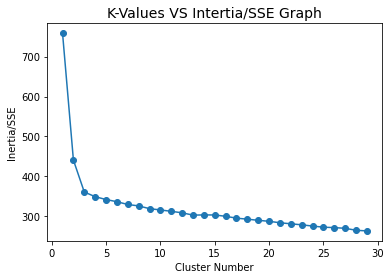

In [36]:
#plotting the kvalues vs inertia graph
plt.plot(k_cluster_range, inertia, 'o-')
plt.xlabel('Cluster Number')
plt.ylabel('Inertia/SSE')
plt.title('K-Values VS Intertia/SSE Graph', size=14)
plt.show()
#save the plot
#plt.savefig('elbow_method.png')

Explained variance is 0.527.


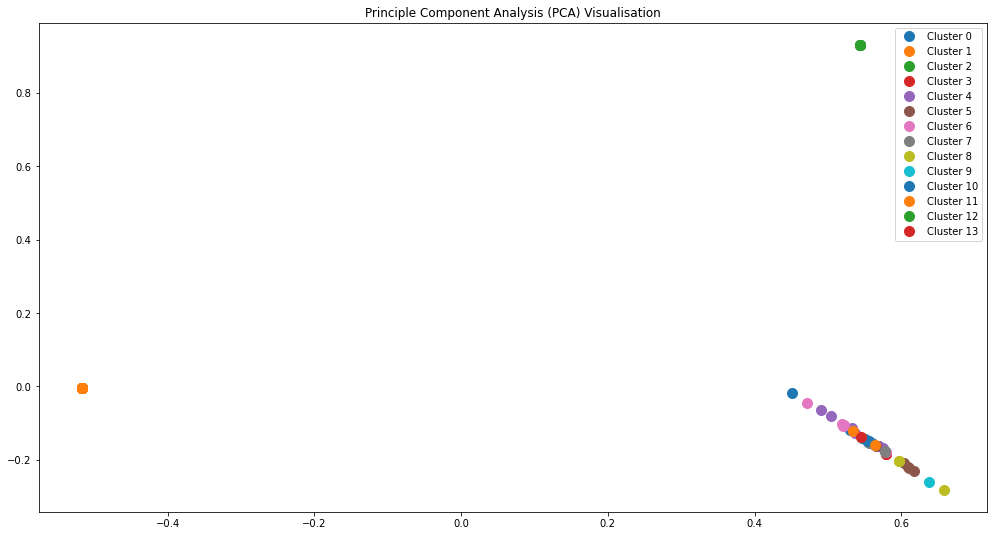

In [37]:
pca=PCA(n_components=2)
X_2d=pca.fit_transform(X.todense())

print('Explained variance is {}.'.format(round(pca.explained_variance_ratio_.sum(), 4)))

df = pd.DataFrame(dict(x=X_2d[:,0], y=X_2d[:,1], label=user_dataset['cluster'])) 
df_sample=df.sample(100)
groups = df_sample.groupby('label')

fig, ax = plt.subplots(figsize=(17, 9)) 
for cluster_name in np.arange(len(df_sample['label'].unique())):
    temp=df_sample[df_sample['label']==cluster_name]
    ax.plot(temp.x, temp.y, marker='o', linestyle='', ms=10, 
        label='Cluster '+str(cluster_name))
ax.legend(numpoints=1) 
plt.title('Principle Component Analysis (PCA) Visualisation')
plt.show()

### User Dataset -  Degree1 Specializations, Career Objective & Key Skills

In [38]:
comb_user_frame = user_dataset.degree_1_specializations.str.cat(" " + user_dataset.career_objective.str.cat(" " + user_dataset.key_skills_str))
comb_user_frame = comb_user_frame.replace({"[^A-Za-z0-9 ]+": ""}, regex=True)

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(comb_user_frame.values.astype('U'))
X.shape #(10,000 x 69)

(1097, 1697)

In [44]:
#other clustering 
#elbow method from https://github.com/ashishrana160796/online-course-recommendation-system/blob/master/elbow_test.py
k_cluster_range = range(1,8)
inertia = np.zeros(len(k_cluster_range)) #sum of squares errors

for i in range(len(k_cluster_range)):
    kmeans = KMeans(n_clusters=i+1, init='k-means++', random_state=1234, max_iter=100).fit(X)
    comb_user_frame["clusters"] = kmeans.labels_
    inertia[i] = kmeans.inertia_

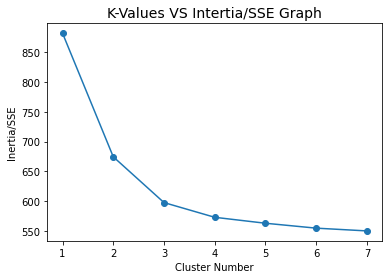

In [45]:
#plotting the kvalues vs inertia graph
plt.plot(k_cluster_range, inertia, 'o-')
plt.xlabel('Cluster Number')
plt.ylabel('Inertia/SSE')
plt.title('K-Values VS Intertia/SSE Graph', size=14)
plt.show()
#save the plot
#plt.savefig('elbow_method.png')

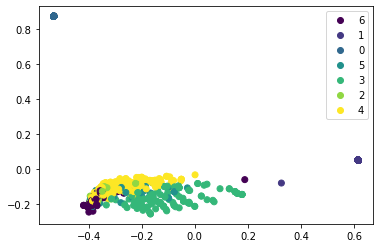

In [46]:
pca=PCA(n_components=2)
X_2d=pca.fit_transform(X.todense())
df = pd.DataFrame(dict(x=X_2d[:,0], y=X_2d[:,1], label=comb_user_frame["clusters"]))

plot = plt.scatter(df.x, df.y, c=df.label)
plt.legend(handles=plot.legend_elements()[0], labels=list(df["label"].unique()))
plt.show()

Explained variance is 0.3351.


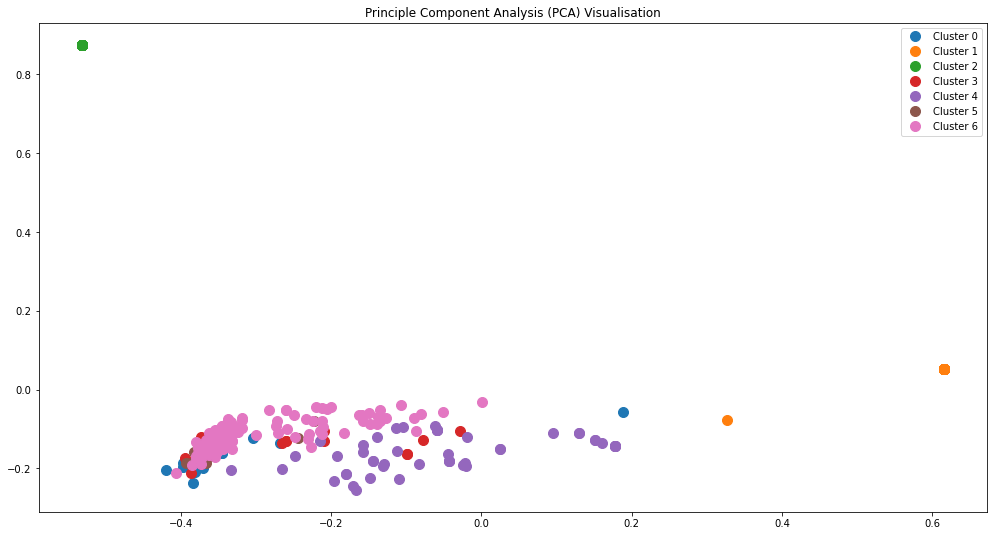

In [47]:
pca=PCA(n_components=2)
X_2d=pca.fit_transform(X.todense())

print('Explained variance is {}.'.format(round(pca.explained_variance_ratio_.sum(), 4)))

df = pd.DataFrame(dict(x=X_2d[:,0], y=X_2d[:,1], label=comb_user_frame["clusters"])) 
df_sample=df.sample(500)
groups = df_sample.groupby('label')

fig, ax = plt.subplots(figsize=(17, 9)) 
for cluster_name in np.arange(len(df_sample['label'].unique())):
    temp=df_sample[df_sample['label']==cluster_name]
    ax.plot(temp.x, temp.y, marker='o', linestyle='', ms=10, 
        label='Cluster '+str(cluster_name))
ax.legend(numpoints=1) 
plt.title('Principle Component Analysis (PCA) Visualisation')
plt.show()